In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

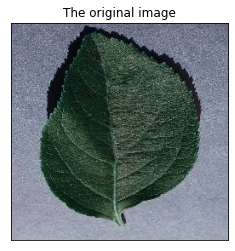

In [2]:
ref = cv2.imread('/content/0a285c8b-1c31-48d4-89f2-af8b9edc36f6___RS_HL 5759.JPG')
plt.imshow(ref), plt.grid(False)

# while learning how to perform spatial filtering,
# you can also note how to apply different python commands.
plt.title('The original image')
plt.xticks([])
plt.yticks([])
plt.show()

There are two key factors in applying a filter on an image in digital image processing; 

1) the kernal type (and size)

2) the padding method (padding is the extrapolation procedure which describes the kernel output over the borders of the image).

There are different methods for defining the kernel and introducing the padding method in OpenCV. Unlike MATLAB that the kernel parameters are defined very easily, in OpenCV you have more control over the parameters and should take a longer way to reach the goal.



**1-Averaging filter**



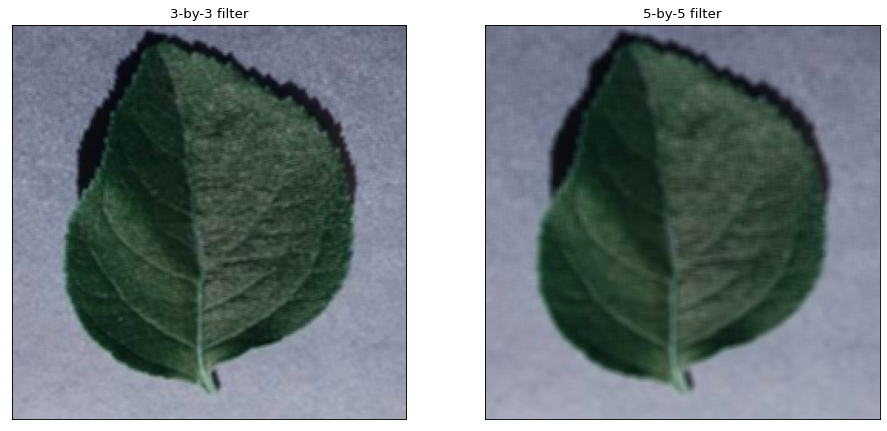

In [6]:
# Defining a kernel using numpy.
kernel_5 = np.ones((5,5),np.float32)/25
kernel_3 = np.ones((3,3),np.float32)/9

# Convolves an image with the kernel.
# -1 means that the center of the kernel is located on the center pixel.
# compare two kernel sizes.
filtered_5 = cv2.filter2D(ref,-1,kernel_5)
filtered_3 = cv2.filter2D(ref,-1,kernel_3)

# plot the results in two subplots.
fig=plt.figure(figsize=(14, 14), dpi= 80, facecolor='w', edgecolor='k')

plt.subplot(121), plt.imshow(filtered_3), plt.title('3-by-3 filter')
plt.grid(False)
plt.xticks([])
plt.yticks([])

plt.subplot(122), plt.imshow(filtered_5), plt.title('5-by-5 filter')
plt.grid(False)
plt.xticks([])
plt.yticks([])

plt.show()

The complete command for performing 2D spatial filter over images in OpenCV is cv2.filter2D with the following list of parameters. Some of the parameters are not necessarily used.

cv2.filter2D(src, ddepth, kernel[, dst[, anchor[, delta[, borderType]]]])

src – input image.

ddepth – desired depth of the destination image; if it is negative, it will be the same as src.depth(); the following combinations of src.depth() and ddepth are supported:

src.depth() = CV_8U, ddepth = -1/CV_16S/CV_32F/CV_64F

src.depth() = CV_16U/CV_16S, ddepth = -1/CV_32F/CV_64F

src.depth() = CV_32F, ddepth = -1/CV_32F/CV_64F

src.depth() = CV_64F, ddepth = -1/CV_64F

when ddepth=-1, the output image will have the same depth as the source.

kernel – convolution kernel (or rather a correlation kernel), a single-channel floating point matrix; if you want to apply different kernels to different channels, split the image into separate color planes using split() and process them individually.

anchor – anchor of the kernel that indicates the relative position of a filtered point within the kernel; the anchor should lie within the kernel; default value (-1,-1) means that the anchor is at the kernel center.

The anchor can be replaced by a single -1, indicating that the center of the kernel is on its middle pixel.

delta – optional value added to the filtered pixels before storing them in dst.

borderType – pixel extrapolation method (see [borderInterpolate()]

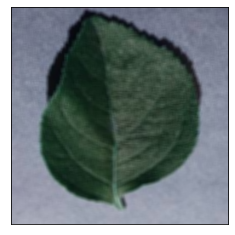

(<matplotlib.image.AxesImage at 0x7f9899312710>,
 None,
 ([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>),
 None)

In [7]:
blurred = cv2.blur(ref, (5, 5), -1)

plt.imshow(blurred), plt.grid(False), plt.xticks([]), plt.yticks([]), plt.show()

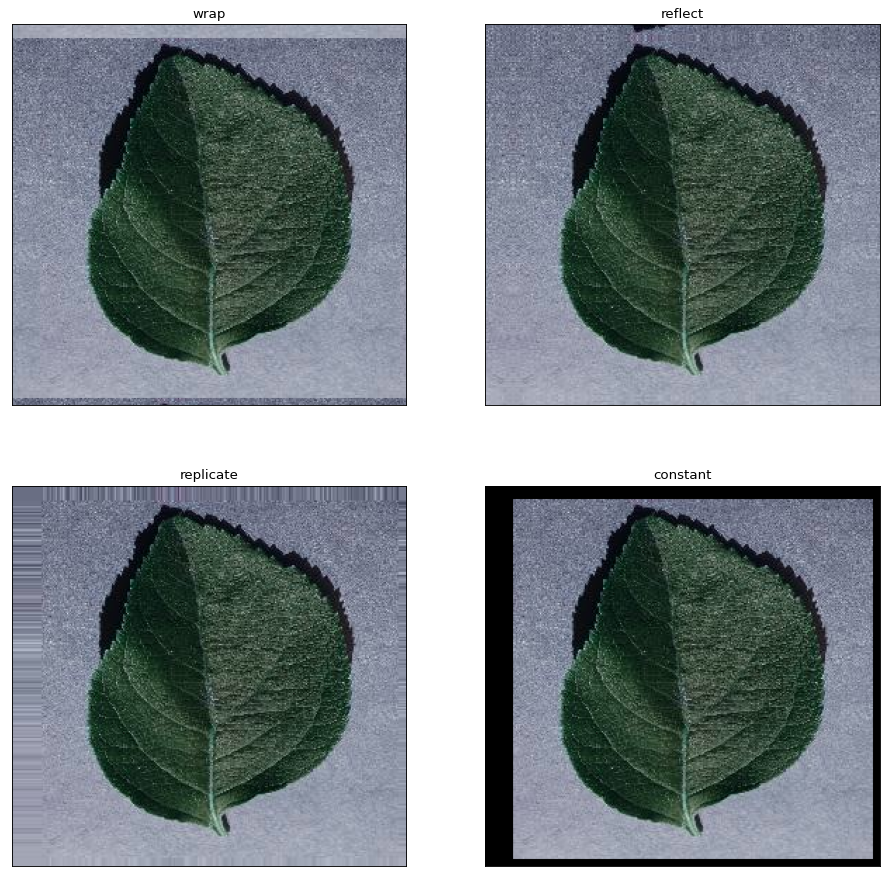

In [8]:
top = 10; bottom = 5; left = 20; right = 5
const = 100
img2 = cv2.copyMakeBorder(ref, top, bottom, left, right, 
                          cv2.BORDER_WRAP)
img3 = cv2.copyMakeBorder(ref, top, bottom, left, right, 
                          cv2.BORDER_REFLECT)
img4 = cv2.copyMakeBorder(ref, top, bottom, left, right, 
                          cv2.BORDER_REPLICATE)
img5 = cv2.copyMakeBorder(ref, top, bottom, left, right, 
                          cv2.BORDER_CONSTANT, const)

# Display the images
fig=plt.figure(figsize=(14, 14), dpi= 80, facecolor='w', edgecolor='k')

plt.subplot(221), plt.imshow(img2), plt.grid(False)
plt.xticks([]), plt.yticks([]), plt.title('wrap')

plt.subplot(222), plt.imshow(img3), plt.grid(False)
plt.xticks([]), plt.yticks([]), plt.title('reflect')

plt.subplot(223), plt.imshow(img4), plt.grid(False)
plt.xticks([]), plt.yticks([]), plt.title('replicate')

plt.subplot(224), plt.imshow(img5), plt.grid(False)
plt.xticks([]), plt.yticks([]), plt.title('constant')

plt.show()

**3-User-defined kernels**

One can apply user-defined kernels just like the way we applied in section 1. For example, consider applying the following kernel (which is a vertical gradient filter) on the image.

 


(([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

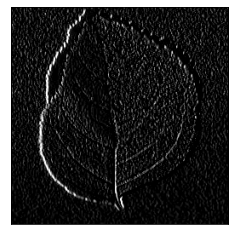

In [9]:
vertical_gd = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])

# apply it.
filter_v = cv2.filter2D(ref[:, :, 2], -1, vertical_gd)

# show in a different colormap.
plt.imshow(filter_v, cmap='gray'), plt.grid(False)
plt.xticks([]), plt.yticks([])

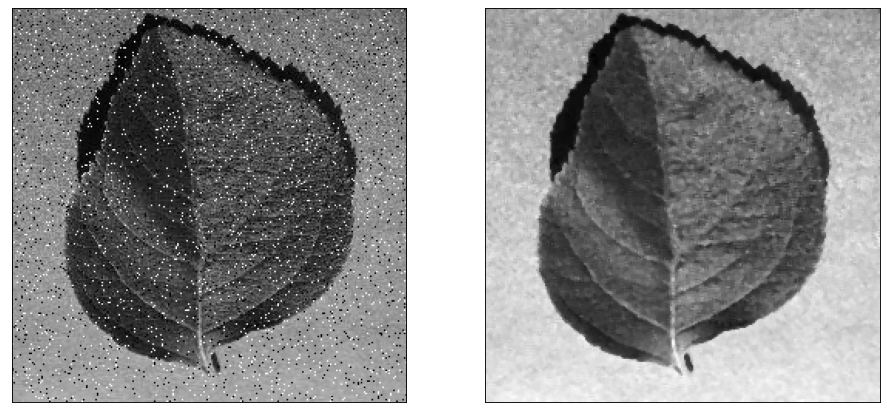

In [10]:
s_and_p = np.random.rand(ref.shape[0], ref.shape[1])

# if we consider 5% salt and pepper noise, we'd like to have
# 2.5% salt and 2.5% pepper. thus:
salt = s_and_p > .975
pepper = s_and_p < .025

# in order to add some noise, we should turn off black (pepper) locations and
# turn on white (white) locations.
channel_2 = np.atleast_1d(ref[:, :, 1])
noisy = np.zeros_like(channel_2)

for i in range(channel_2.shape[0]*channel_2.shape[1]):
  if salt.ravel()[i] == 1:
    noisy.ravel()[i] = 255
  elif pepper.ravel()[i] == 1:
    noisy.ravel()[i] = 0
  else:
    noisy.ravel()[i] = channel_2.ravel()[i]

# apply median filter with size 3
Med = cv2.medianBlur(noisy, 3)

# Display the results
fig=plt.figure(figsize=(14, 14), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(121), plt.xticks([]), plt.yticks([])
plt.imshow(noisy, cmap='gray'), plt.grid(False)
plt.subplot(122), plt.xticks([]), plt.yticks([])
plt.imshow(Med, cmap='gray'), plt.grid(False)
plt.show()

(<matplotlib.image.AxesImage at 0x7f9897ab94d0>, None)

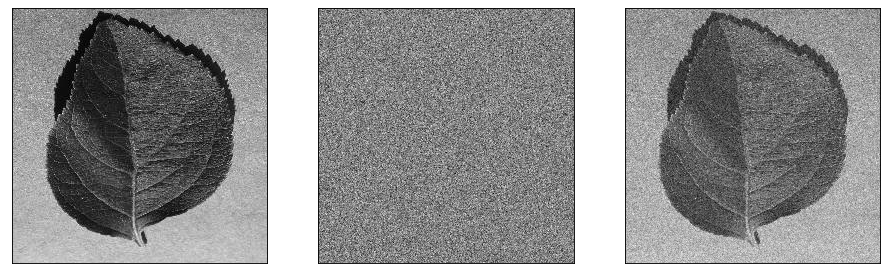

In [11]:
mean = 0
sigma = 20.0
gauss_noise = np.random.normal(mean, sigma, (ref.shape[0], ref.shape[1]))

# Convert RGB image to Grayscale image using cvtColor()
gray = cv2.cvtColor(ref, cv2.COLOR_BGR2GRAY)

# Add gaussian noise to the image
g_noisy = gray + gauss_noise # Gaussian noisy image

# Showing gray image, noise image, and noisy image
fig=plt.figure(figsize=(14, 14), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(131), plt.xticks([]), plt.yticks([])
plt.imshow(gray, cmap='gray'), plt.grid(False)
plt.subplot(132), plt.xticks([]), plt.yticks([])
plt.imshow(gauss_noise, cmap='gray'), plt.grid(False)
plt.subplot(133), plt.xticks([]), plt.yticks([])
plt.imshow(g_noisy, cmap='gray'), plt.grid(False)

(([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

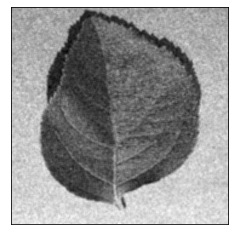

In [12]:
g_filtered = cv2.GaussianBlur(g_noisy, (3, 3), 20, 20)

# Display the result
plt.imshow(g_filtered, cmap='gray'), plt.grid(False)
plt.xticks([]), plt.yticks([])

[[0.33319442]
 [0.33361117]
 [0.33319442]]


(<matplotlib.image.AxesImage at 0x7f98979ffbd0>, None)

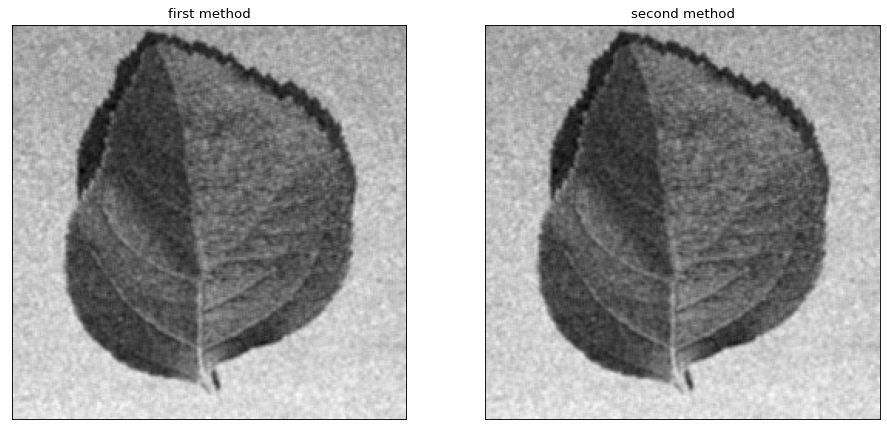

In [13]:
g_kernel = cv2.getGaussianKernel(3, 20)
print(g_kernel)

# Apply two separate kernels over the image.
g_filtered_2 = cv2.sepFilter2D(g_noisy, -1, g_kernel, g_kernel)

# Displaying the results.
fig=plt.figure(figsize=(14, 14), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(121), plt.xticks([]), plt.yticks([]), plt.title('first method')
plt.imshow(g_filtered, cmap='gray'), plt.grid(False)
plt.subplot(122), plt.xticks([]), plt.yticks([]), plt.title('second method')
plt.imshow(g_filtered_2, cmap='gray'), plt.grid(False)